In [ ]:
#!pip install tensorflow-gpu

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [48]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
## HERE Exited is dependent feature, remaining all are independent features

In [50]:
## Divide the dataset into dependent and independent feature

In [51]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,-1]

In [52]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [53]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [54]:
## Feature Engineering

In [55]:
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [56]:
X=x.drop(['Gender','Geography'],axis=1)

In [57]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [58]:
X=pd.concat([X,geography,gender],axis=1)

In [59]:
#Spliting the dataset in to training set and testset
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [61]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [62]:
x_train.shape

(8000, 11)

In [63]:
x_test.shape

(2000, 11)

In [ ]:
## Part-2 Making ANN model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [65]:
### lets initilize the ANN
classifier=Sequential()

In [66]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [67]:
## Adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [68]:
## Adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [69]:
## Adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [70]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# own learning_rate
#classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

## where is learning rate??

### ans-by default adam uses learning rate of 0.01

In [71]:
#own learning_rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [72]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [73]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.5417 - accuracy: 0.7481 - val_loss: 0.4574 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4773 - accuracy: 0.7938 - val_loss: 0.4378 - val_accuracy: 0.7959
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4555 - accuracy: 0.7981 - val_loss: 0.4265 - val_accuracy: 0.7959
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4398 - accuracy: 0.8041 - val_loss: 0.4152 - val_accuracy: 0.8092
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4286 - accuracy: 0.8119 - val_loss: 0.4059 - val_accuracy: 0.8209
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4152 - accuracy: 0.8197 - val_loss: 0.3962 - val_accuracy: 0.8319
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4022 - accuracy: 0.8328 - val_loss: 0.3869 - val_accuracy:

536/536 [==============================] - 3s 5ms/step - loss: 0.3615 - accuracy: 0.8496 - val_loss: 0.3571 - val_accuracy: 0.8531
Epoch 58/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3584 - accuracy: 0.8520 - val_loss: 0.3552 - val_accuracy: 0.8535
Epoch 59/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3565 - accuracy: 0.8479 - val_loss: 0.3554 - val_accuracy: 0.8561
Epoch 60/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3502 - accuracy: 0.8584 - val_loss: 0.3544 - val_accuracy: 0.8554
Epoch 61/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3623 - accuracy: 0.8565 - val_loss: 0.3555 - val_accuracy: 0.8535
Epoch 62/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3527 - accuracy: 0.8582 - val_loss: 0.3560 - val_accuracy: 0.8516
Epoch 63/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3503 - accuracy: 0.8543 - val_loss: 0.3565 - val_accuracy: 0.8531

In [83]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

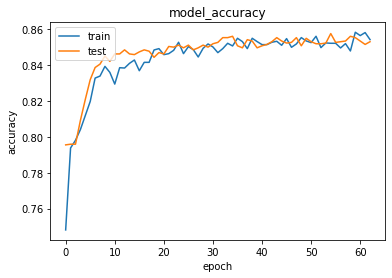

In [84]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

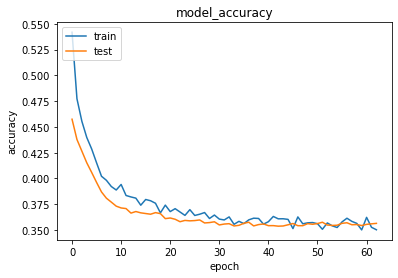

In [85]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [86]:
# Part-3 Making and predictions and evaluating the model
# Predicting the test set results

In [87]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [88]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1555,   40],
       [ 237,  168]], dtype=int64)

In [89]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [90]:
score

0.8615

In [91]:
## get the weights
classifier.get_weights()


[array([[ 0.11561818, -0.00856844, -0.02506659,  0.11219334, -0.00350469,
         -0.33686426, -0.03450713, -0.2750601 ,  0.02206774, -0.15756632,
          0.08270175],
        [-0.6890731 ,  0.11533858,  0.06251533,  0.10239713, -0.72592515,
         -0.31129527,  0.04180514,  0.6734693 , -0.74678457, -0.87505394,
          0.3539808 ],
        [ 0.11792027,  0.01838809,  0.07371818,  0.28597027, -0.06833172,
         -0.14842574, -0.05845388, -0.02632246,  0.12259269, -0.01167121,
          0.06554068],
        [ 0.13508889,  0.07817442, -1.055722  , -0.6156613 , -0.40760475,
          0.5383261 ,  0.42587948,  0.09041698, -0.14250675, -0.3568584 ,
         -0.6568978 ],
        [-0.00274896,  1.1286067 , -1.1164511 ,  0.07422671, -0.24098684,
         -0.02319224, -0.88900185, -0.39979407,  0.1105958 , -0.08240556,
          0.30951387],
        [ 0.04087307, -0.00403151,  0.00998374,  0.18965225,  0.20227267,
          0.02630851, -0.14909104,  0.36984965, -0.16184223, -0.2112772